# DACON 컴퓨터 비전 학습 경진대회
### 2020.08.03 ~ 2020.09.14 17:59

## Python import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf


## Load Data

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

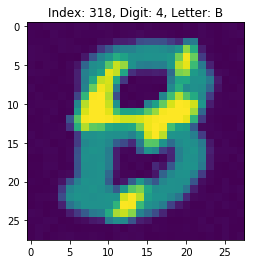

In [6]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [10]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [7]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128,kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [11]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Train on 2048 samples
Epoch 1/20
2048/2048 [==============================] - 9s 4ms/sample - loss: 2.5842 - accuracy: 0.4448
Epoch 2/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.8404 - accuracy: 0.7275
Epoch 3/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.4653 - accuracy: 0.8433
Epoch 4/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.2919 - accuracy: 0.8999
Epoch 5/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.2242 - accuracy: 0.9219
Epoch 6/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.1901 - accuracy: 0.9399
Epoch 7/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.1414 - accuracy: 0.9565
Epoch 8/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0871 - accuracy: 0.9712
Epoch 9/20
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0638 - accuracy: 0.9795
Epoch 10/20
2048/2048 [===================

## Predict

In [14]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,8
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [15]:
submission.to_csv('baseline.csv', index=False)